In [ ]:
!pip install japanize-matplotlib

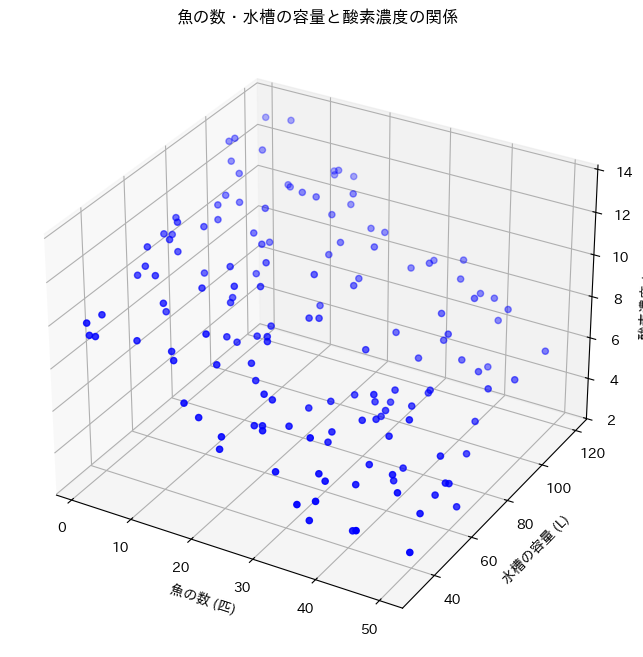

In [2]:
import japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3Dグラフを描くために必要

# 乱数のシードを固定
np.random.seed(0)

# データ数を150に増やす
n_samples = 150

# 魚の数 (1匹から50匹まで) をランダムに生成
X_fish_count = np.random.randint(1, 51, n_samples)
# 水槽の容量 (30Lから120Lまで) をランダムに生成
X_tank_capacity = np.random.randint(30, 121, n_samples)

# 2つの特徴量を1つの行列にまとめる
# これがモデルに入力するデータ (X) となる
X = np.c_[X_fish_count, X_tank_capacity]

# 酸素濃度を計算
# 基本濃度8mg/L、魚1匹あたり-0.15、水槽1Lあたり+0.05、ノイズを加える
y = 8 - 0.15 * X_fish_count + 0.05 * X_tank_capacity + np.random.normal(0, 0.5, n_samples)

# 3Dグラフでデータの関係を可視化
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='blue', marker='o')

ax.set_title('魚の数・水槽の容量と酸素濃度の関係')
ax.set_xlabel('魚の数 (匹)')
ax.set_ylabel('水槽の容量 (L)')
ax.set_zlabel('酸素濃度 (mg/L)')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 2. 線形回帰モデルを準備
model = LinearRegression()

# 3. 訓練データを使ってモデルを学習
model.fit(X_train, y_train)

print("モデルの学習が完了しました。")
# 学習によって見つけ出された平面の係数（傾き）と切片
print(f"係数 (魚の数, 水槽の容量): {model.coef_}")
print(f"切片: {model.intercept_:.4f}")

モデルの学習が完了しました。
係数 (魚の数, 水槽の容量): [-0.15101752  0.04825657]
切片: 8.1265


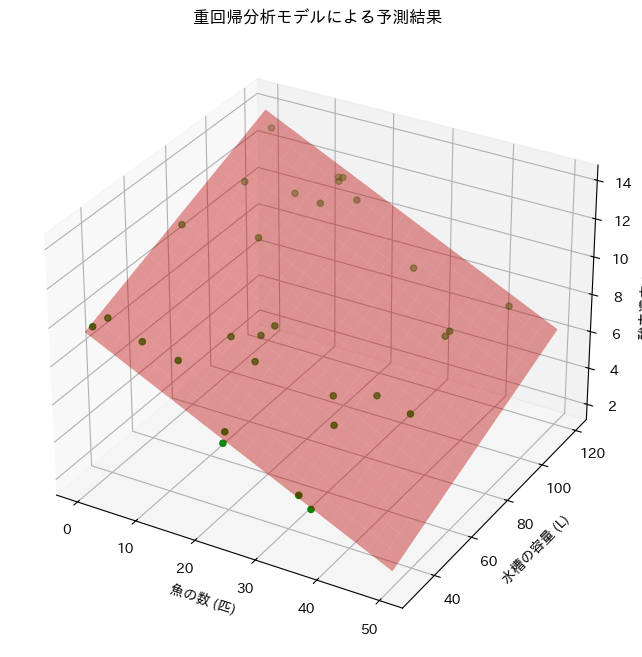


魚が25匹、水槽が5Lの時の予測される酸素濃度は 4.59 mg/L です。


In [5]:
# グラフ描画のために、平面のメッシュデータを作成
x_surf = np.arange(0, 51, 2)  # 魚の数の範囲
y_surf = np.arange(30, 121, 5) # 水槽の容量の範囲
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# モデルを使って平面上の各点のz座標（酸素濃度）を予測
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

# 3Dグラフで結果を可視化
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# テストデータを点でプロット
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='green', marker='o', label='実際のテストデータ')

# モデルが予測した平面をプロット
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.4, label='モデルの予測平面')

ax.set_title('重回帰分析モデルによる予測結果')
ax.set_xlabel('魚の数 (匹)')
ax.set_ylabel('水槽の容量 (L)')
ax.set_zlabel('酸素濃度 (mg/L)')
# legend()は3Dプロットでは少し工夫が必要なため、ここでは省略します
plt.show()


# 新しいデータで予測してみる
new_data = np.array([[25, 5]]) # 魚が40匹、水槽が50Lの場合
predicted_oxygen = model.predict(new_data)
print(f"\n魚が{new_data[0][0]}匹、水槽が{new_data[0][1]}Lの時の予測される酸素濃度は {predicted_oxygen[0]:.2f} mg/L です。")